<a href="https://colab.research.google.com/github/eshu077/Complete_Machine_Learning/blob/main/Ridge_and_Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
data = pd.read_csv('Melbourne_housing_cleaned.csv')
data

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,2,4019.0,2.5,2.0,1.0,1.0,202.000000,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,4019.0,2.5,2.0,1.0,0.0,156.000000,79.0000,1035000.0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,4019.0,2.5,3.0,2.0,0.0,134.000000,150.0000,1465000.0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,4019.0,2.5,3.0,2.0,1.0,94.000000,160.2564,850000.0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,4019.0,2.5,3.0,1.0,2.0,120.000000,142.0000,1600000.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27239,4,6543.0,6.3,4.0,1.0,3.0,593.000000,160.2564,1480000.0,0,...,0,0,0,0,0,0,0,0,0,0
27240,2,6543.0,6.3,2.0,2.0,1.0,98.000000,104.0000,888000.0,0,...,0,0,0,0,0,0,0,0,0,0
27241,2,6543.0,6.3,2.0,1.0,2.0,220.000000,120.0000,705000.0,0,...,0,0,0,0,0,0,0,0,0,0
27242,3,6543.0,6.3,0.0,0.0,0.0,593.598993,160.2564,1140000.0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.nunique()

,0
Rooms,12
Propertycount,336
Distance,213
Bedroom2,14
Bathroom,10
...,...
CouncilArea_Whitehorse City Council,2
CouncilArea_Whittlesea City Council,2
CouncilArea_Wyndham City Council,2
CouncilArea_Yarra City Council,2


In [ ]:
data.shape

(27244, 745)

In [ ]:
data.isna().sum()

,0
Rooms,0
Propertycount,0
Distance,0
Bedroom2,0
Bathroom,0
...,...
CouncilArea_Whitehorse City Council,0
CouncilArea_Whittlesea City Council,0
CouncilArea_Wyndham City Council,0
CouncilArea_Yarra City Council,0


In [ ]:
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
X_train.shape, X_test.shape

((19070, 744), (8174, 744))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

0.6827792395792723

In [ ]:
reg.score(X_test, y_test)

0.13853683161594055

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(X_test, y_test)

0.6636111369404489

In [ ]:
lasso_reg.score(X_train, y_train)

0.6766985624766824

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(X_test, y_test)

0.6670848945194958

In [ ]:
ridge_reg.score(X_train, y_train)

0.6622376739684328

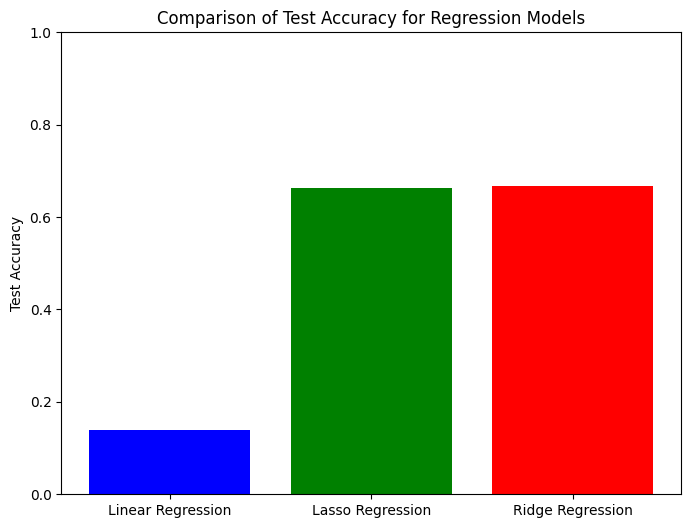

In [ ]:
import matplotlib.pyplot as plt

# Get the test scores
linear_test_score = reg.score(X_test, y_test)
lasso_test_score = lasso_reg.score(X_test, y_test)
ridge_test_score = ridge_reg.score(X_test, y_test)

# Create a bar chart
models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression']
scores = [linear_test_score, lasso_test_score, ridge_test_score]

plt.figure(figsize=(8, 6))
plt.bar(models, scores, color=['blue', 'green', 'red'])
plt.ylabel('Test Accuracy')
plt.title('Comparison of Test Accuracy for Regression Models')
plt.ylim(0, 1) # Assuming accuracy is between 0 and 1
plt.show()